In [17]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [18]:
#NNATURALNESS 
using Revise
using Newtrinos
using Newtrinos.osc


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

[ Info: Loading Katrin data


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [19]:
using DelimitedFiles


eigen1= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/eigen_data3.csv", ',')

eigen2= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/eigen_data2.csv", ',')

Usector1= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/Usector_data3.csv", ',')
Usector2= readdlm("/home/sofialon/Newtrinos.jl/src/experiments/katrin/Usector_data2.csv", ',');

In [20]:
function check_unitarity(U)
    n = size(U, 1)
    
    # Check row normalization
    for i in 1:n
        row_norm = sum(abs2, U[i, :])
        println("Row $i norm²: ", row_norm)
    end
    
    # Check column normalization  
    for j in 1:n
        col_norm = sum(abs2, U[:, j])
        println("Column $j norm²: ", col_norm)
    end
    
    # Check if U†U ≈ I
    println("||U†U - I||: ", norm(U' * U - I))
end

check_unitarity (generic function with 1 method)

In [21]:
for i in length(Usector1[1,:])
    norm=Vector{Float64}(undef, length(Usector1[1,:]))
    norm[i]= LinearAlgebra.norm(Usector1[i,:])
    println("Usector1 column $i norm: ", norm)
end

#the vectors are not normalized

Usector1 column 100 norm: [NaN, 5.0e-324, 5.0e-324, 5.0e-324, 5.0e-324, 5.0e-324, 1.5e-323, 1.5e-323, 2.0e-323, 2.0e-323, 1.5e-323, 1.5e-323, 3.0e-323, 3.0e-323, 3.0e-323, 3.0e-323, 4.0e-323, 4.0e-323, 4.4e-323, 4.4e-323, 5.0e-323, 5.0e-323, 4.4e-323, 4.4e-323, 6.0e-323, 6.0e-323, 4.0e-323, 4.0e-323, 7.0e-323, 7.0e-323, 7.4e-323, 7.4e-323, 8.0e-323, 8.0e-323, 8.4e-323, 8.0e-323, 9.0e-323, 8.0e-323, 8.4e-323, 8.0e-323, 1.0e-322, 8.0e-323, 1.04e-322, 8.0e-323, 1.1e-322, 8.0e-323, 1.04e-322, 8.0e-323, 1.2e-322, 8.0e-323, 1.0e-322, 8.0e-323, 1.3e-322, 8.0e-323, 7.4e-323, 7.4e-323, 1.1e-322, 1.1e-322, 1.0e-322, 1.0e-322, 8.4e-323, 8.4e-323, 1.53e-322, 8.4e-323, 1.6e-322, 8.4e-323, 1.63e-322, 8.4e-323, 1.7e-322, 8.4e-323, 1.73e-322, 8.4e-323, 1.8e-322, 8.4e-323, 1.73e-322, 8.4e-323, 1.7e-322, 8.4e-323, 1.93e-322, 8.4e-323, 2.0e-322, 8.4e-323, 2.03e-322, 8.4e-323, 2.0e-322, 8.4e-323, 2.1e-322, 8.4e-323, 2.17e-322, 8.4e-323, 2.2e-322, 8.4e-323, 1.53e-322, 8.4e-323, 2.0e-322, 2.0e-322, 1.8e-322

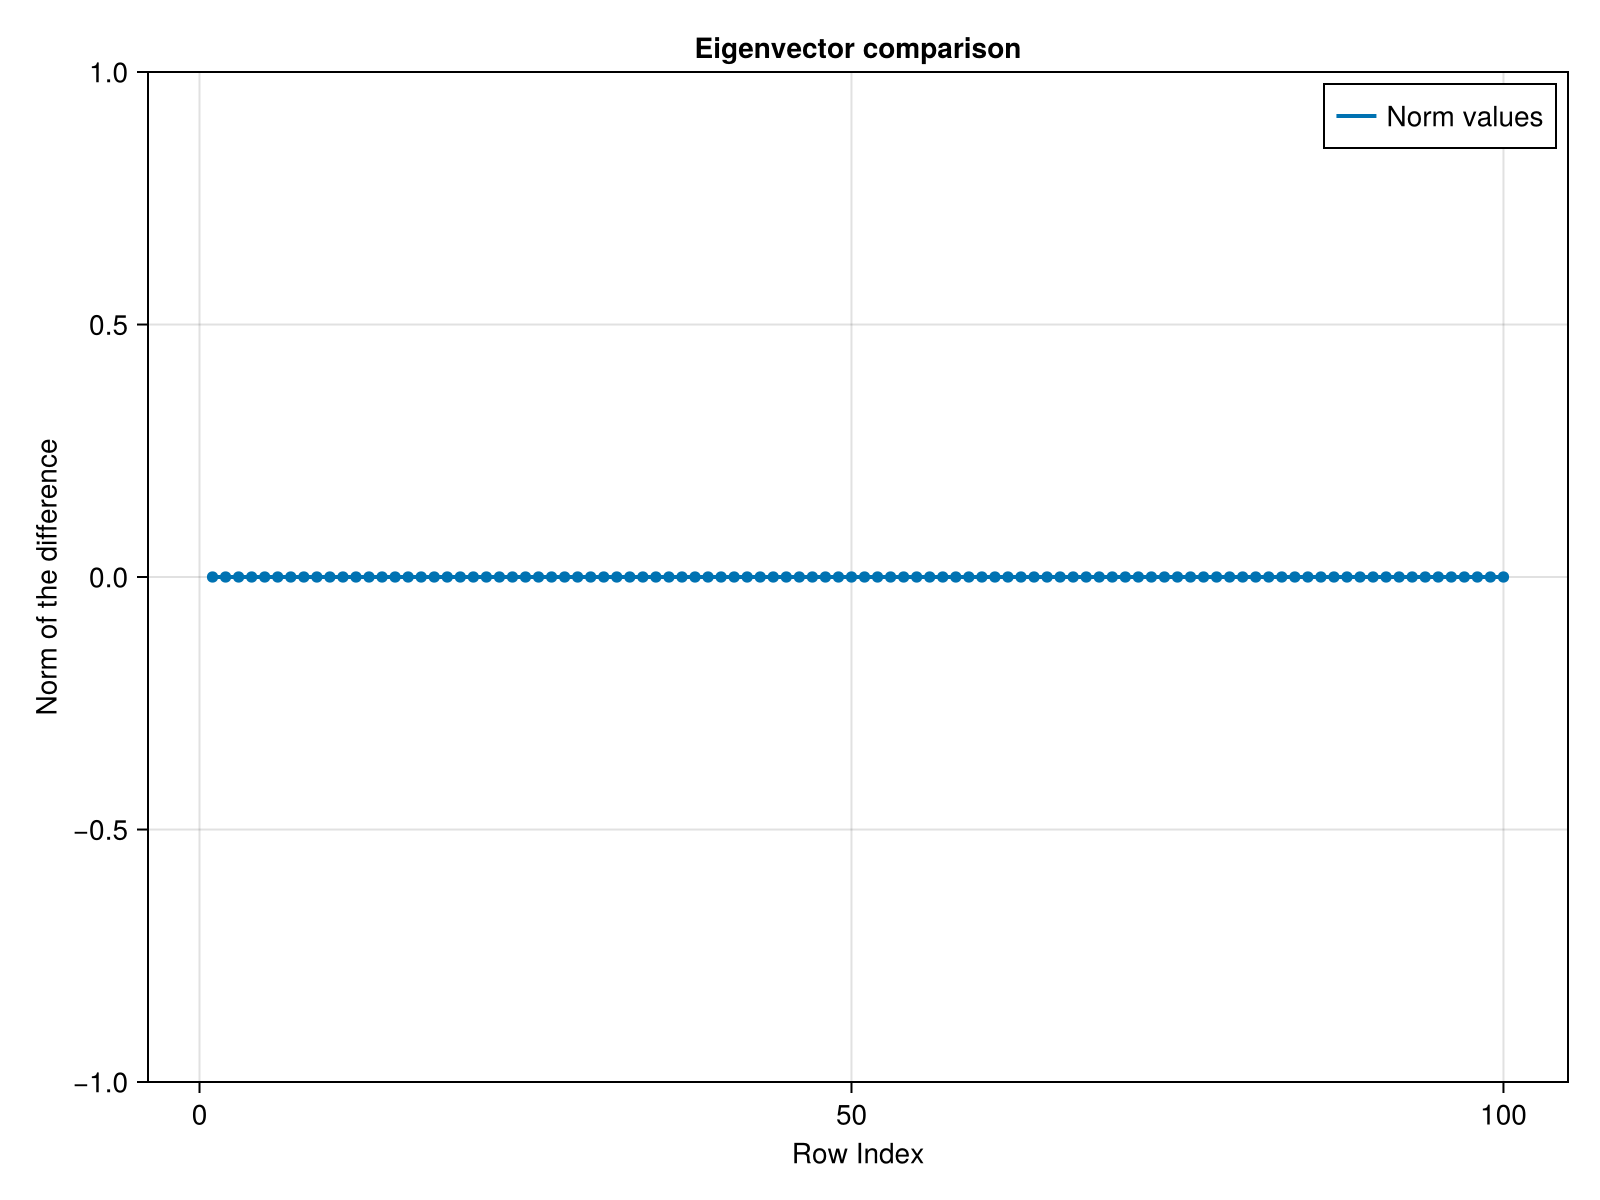

In [24]:

# Vectorized calculation
d=length(Usector1[:,1])
product = [norm(Usector1[:,i] .- Usector2[:,i]) for i in 1:d]
#product = [norm(Usector1[:,i] .* Usector2[:,i]) for i in 1:d]

# Plot
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], 
    xlabel = "Row Index", 
    ylabel = "Norm of the difference",
    title = "Eigenvector comparison"
)

lines!(ax, 1:length(product), product, linewidth = 2, label = "Norm values")
scatter!(ax, 1:length(product), product, markersize = 8)

# Add legend if you want
axislegend(ax)

fig

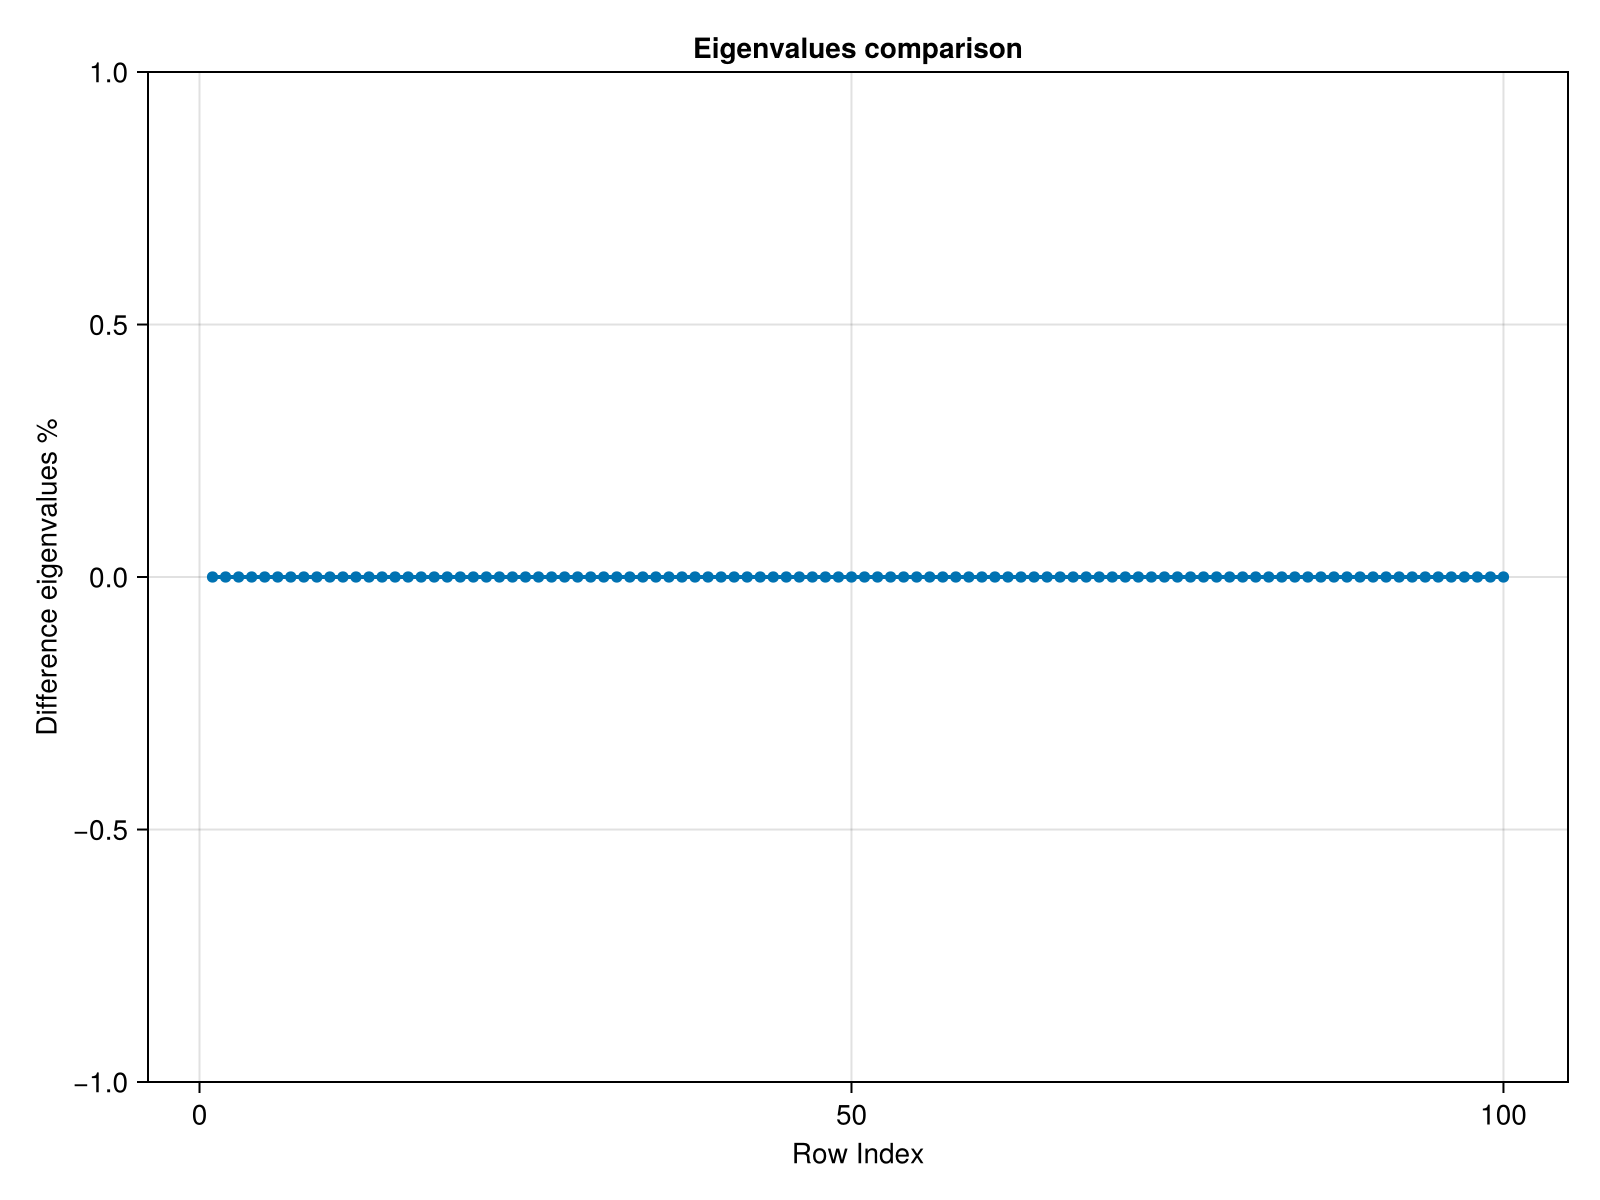

In [ ]:

# Vectorized calculation
d=length(eigen1)
product = [(eigen1[i].- eigen2[i])./eigen1[i] for i in 1:d]*100


# Plot
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], 
    xlabel = "Row Index", 
    ylabel = "Difference eigenvalues %",
    title = "Eigenvalues comparison"
)

lines!(ax, 1:length(product), product, linewidth = 2 ) #label = "Norm values"
scatter!(ax, 1:length(product), product, markersize = 8)



fig

In [ ]:
f,h,Usector=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.08171625600906857, 0.08240687941681685, 0.10441878085899331, 0.24463360541891038, 0.24655099646771478, 0.3076630617682533, 0.4888649671195407  …  471.59516879785275, 386.0517463925226, 388.9587913428583, 481.6136104770638, 394.2702158290588, 397.23914585425166, 491.86639765322576, 1.0002666

In [ ]:
masses=0.1.+h

300-element Vector{Float64}:
   0.1
   0.1000753
   0.1024753
   0.18171625600906857
   0.18240687941681685
   0.20441878085899332
   0.3446336054189104
   0.3465509964677148
   0.4076630617682533
   0.5888649671195407
   0.5926214203219509
   0.7123490124306406
   0.914345999642497
   ⋮
 378.12112454037396
 380.967698908163
 471.6951687978528
 386.1517463925226
 389.05879134285834
 481.7136104770638
 394.37021582905885
 397.3391458542517
 491.9663976532258
   1.0002666822305828e10
   1.0077986903477114e10
   1.2478626940808912e10

In [ ]:
using LinearAlgebra

U_original = copy(Usector)  # Original PMNS matrix
U_modified= copy(Usector)
zero_positions = []  # To store positions of zero masses

for i in 1:length(masses)
    if masses[i] == 0
    # Handle zero masses
    zero_positions = [1,(i)]
    U_modified[zero_positions] .= 0 
    end
end    

# Your iterative approach (preserving zeros)
function restore_unitarity_iterative(U_modified, zero_positions; max_iter=1000, tol=1e-12)
    U = copy(U_modified)
    n = size(U, 1)
    
    for iter in 1:max_iter
        U_old = copy(U)
        
        # Normalize rows
        for i in 1:n
            row_norm = norm(U[i, :])
            if row_norm > tol
                U[i, :] .*= (1.0 / row_norm)
            end
        end
        
        # Ensure zeros stay zero
        for (i, j) in zero_positions
            U[i, j] = 0
        end
        
        # Normalize columns  
        for j in 1:n
            col_norm = norm(U[:, j])
            if col_norm > tol
                U[:, j] .*= (1.0 / col_norm)
            end
        end
        
        # Ensure zeros stay zero
        for (i, j) in zero_positions
            U[i, j] = 0
        end
        
        # Check convergence
        if norm(U - U_old) < tol
            println("Converged after $iter iterations")
            break
        end
        
        if iter == max_iter
            println("Warning: Did not converge after $max_iter iterations")
        end
    end
    
    return U
end

# Simple QR approach (doesn't preserve zeros)
function restore_unitarity_qr(U_modified)
    Q, R = qr(U_modified)
    return Matrix(Q)
end


restore_unitarity_qr (generic function with 1 method)

In [ ]:
Uiter = restore_unitarity_iterative(U_modified, zero_positions)

Converged after 1 iterations


100×100 Matrix{Float64}:
 -0.999854     -0.00809852   0.005092    …  -0.00014823   -0.00999868
  0.00856239   -0.999446     0.0174404      -0.000259367  -0.0173183
  0.00551337    0.0186318    0.99883        -0.000338302  -0.0223578
  0.00434543    0.0109437   -0.0278984      -0.000404463  -0.0264542
  0.00369393    0.00825295  -0.0156324      -0.000463457  -0.0299963
  0.00326623    0.00683484  -0.0114769   …  -0.000517834  -0.0331622
  0.00295848    0.00593996  -0.00933942     -0.000569012  -0.0360512
  0.00272361    0.00531459  -0.00801642     -0.000617877  -0.0387253
  0.00253685    0.00484791  -0.00710629     -0.000665026  -0.0412263
  0.00238377    0.00448337  -0.0064359      -0.000710888  -0.043584
  0.00225536    0.00418888  -0.00591794  …  -0.000755785  -0.0458206
  0.00214565    0.00394481  -0.00550342     -0.000799967  -0.047953
  0.0020505     0.00373838  -0.00516262     -0.000843634  -0.0499946
  ⋮                                      ⋱                
  0.000743739   0.00

In [ ]:
unit_iter=check_unitarity(Uiter)


Row 1 norm²: 1.0000000000000004
Row 2 norm²: 1.0000000000000002
Row 3 norm²: 1.0
Row 4 norm²: 1.0000000000000002
Row 5 norm²: 1.0000000000000002
Row 6 norm²: 0.9999999999999998
Row 7 norm²: 0.9999999999999998
Row 8 norm²: 1.0000000000000004
Row 9 norm²: 1.0
Row 10 norm²: 0.9999999999999999
Row 11 norm²: 1.0000000000000004
Row 12 norm²: 0.9999999999999998
Row 13 norm²: 1.0000000000000007
Row 14 norm²: 0.9999999999999998
Row 15 norm²: 0.9999999999999996
Row 16 norm²: 1.0000000000000002
Row 17 norm²: 1.000000000000001
Row 18 norm²: 0.9999999999999997
Row 19 norm²: 0.9999999999999992
Row 20 norm²: 1.0000000000000007
Row 21 norm²: 1.0000000000000007
Row 22 norm²: 0.9999999999999976
Row 23 norm²: 1.0000000000000038
Row 24 norm²: 0.9999999999999974
Row 25 norm²: 1.000000000000001
Row 26 norm²: 0.999999999999999
Row 27 norm²: 1.0000000000000002
Row 28 norm²: 0.9999999999999994
Row 29 norm²: 1.0000000000000007
Row 30 norm²: 1.0000000000000022
Row 31 norm²: 0.9999999999999963
Row 32 norm²: 1.000

In [ ]:
Uauto= restore_unitarity_qr(U_modified)

100×100 Matrix{Float64}:
 -0.999854     -0.00809852  -0.005092    …  -0.00014823   0.00999868
  0.00856239   -0.999446    -0.0174404      -0.000259367  0.0173183
  0.00551337    0.0186318   -0.99883        -0.000338302  0.0223578
  0.00434543    0.0109437    0.0278984      -0.000404463  0.0264542
  0.00369393    0.00825295   0.0156324      -0.000463457  0.0299963
  0.00326623    0.00683484   0.0114769   …  -0.000517834  0.0331622
  0.00295848    0.00593996   0.00933942     -0.000569012  0.0360512
  0.00272361    0.00531459   0.00801642     -0.000617877  0.0387253
  0.00253685    0.00484791   0.00710629     -0.000665026  0.0412263
  0.00238377    0.00448337   0.0064359      -0.000710888  0.043584
  0.00225536    0.00418888   0.00591794  …  -0.000755785  0.0458206
  0.00214565    0.00394481   0.00550342     -0.000799967  0.047953
  0.0020505     0.00373838   0.00516262     -0.000843634  0.0499946
  ⋮                                      ⋱                
  0.000743739   0.00125627   0.00

In [ ]:
unit_auto=check_unitarity(Uauto)

Row 1 norm²: 1.0000000000000002
Row 2 norm²: 0.9999999999999999
Row 3 norm²: 1.0000000000000002
Row 4 norm²: 1.0
Row 5 norm²: 1.0
Row 6 norm²: 0.9999999999999999
Row 7 norm²: 1.0000000000000004
Row 8 norm²: 1.0000000000000002
Row 9 norm²: 1.0000000000000002
Row 10 norm²: 1.0
Row 11 norm²: 1.0000000000000002
Row 12 norm²: 1.0000000000000009
Row 13 norm²: 1.0000000000000002
Row 14 norm²: 1.0
Row 15 norm²: 0.9999999999999998
Row 16 norm²: 1.0000000000000002
Row 17 norm²: 0.9999999999999998
Row 18 norm²: 1.0000000000000002
Row 19 norm²: 1.0
Row 20 norm²: 1.0000000000000002
Row 21 norm²: 0.9999999999999996
Row 22 norm²: 1.0000000000000007
Row 23 norm²: 0.9999999999999998
Row 24 norm²: 0.9999999999999999
Row 25 norm²: 1.0
Row 26 norm²: 1.0000000000000002
Row 27 norm²: 0.9999999999999998
Row 28 norm²: 0.9999999999999997
Row 29 norm²: 1.0
Row 30 norm²: 1.0000000000000004
Row 31 norm²: 1.0
Row 32 norm²: 1.0000000000000004
Row 33 norm²: 0.9999999999999996
Row 34 norm²: 1.0000000000000002
Row 35 